In [1]:
import numpy as np
from netCDF4 import Dataset
from matplotlib import pyplot as plt
import pandas as pd
import os

In [30]:

folder = '/scratch/es60/rlc599/IQuOD/2010/'
file_name = os.path.join(folder, 'iquod_pfl_2010.nc')
# file_name = os.path.join(folder,'iquod_xbt_1999.nc')

# Open the NetCDF file for reading
with Dataset(file_name, 'r') as src:
    # Read the unique cast identifiers
    wod_unique_cast = src.variables['wod_unique_cast'][:]
    # Read the Temperature_IQUODflag variable
    flags = src.variables['Temperature_IQUODflag'][:]
    # Read the Temperature_row_size variable
    row_sizes = src.variables['Temperature_row_size'][:]

    # Create a DataFrame to hold the flags
    flags_df = pd.DataFrame(flags)
    flags_df['wod_unique_cast'] = 0
    flags_df['depthNumber'] = 0
    flags_df['Depth'] = 0
    # append the data
    flags_df['Temperature'] = src.variables['Temperature'][:]
    
    # Loop over the unique cast identifiers and populate the DataFrame
    start = 0
    for i, cast in enumerate(wod_unique_cast):
        # print(i)
        length = row_sizes[i]
        if np.ma.is_masked(length) or length == 0:
            continue
        flags_df.loc[start:start + int(length) - 1, 'wod_unique_cast'] = cast
        flags_df.loc[start:start + int(length) - 1, 'time'] = src.variables['time'][i]
        flags_df.loc[start:start + int(length) - 1, 'latitude'] = src.variables['lat'][i]
        flags_df.loc[start:start + int(length) - 1, 'longitude'] = src.variables['lon'][i]
        flags_df.loc[start:start + int(length) - 1, 'depthNumber'] = range(int(length))
        flags_df.loc[start:start + int(length) - 1, 'Depth'] = src.variables['z'][start:start + int(length)].astype('int64')
        start += int(length)


In [31]:

# open the WOD file
folderwod = '/scratch/es60/rlc599/IQuOD_WOD/2010/'
file_name_wod = os.path.join(folderwod, 'iquod_pfl_2010.nc')
# Open the NetCDF file for reading and extract the Temperature_WODflag variable and add to the DataFrame
with Dataset(file_name_wod, 'r') as src:
    # Read the Temperature_WODflag variable
    flags_df['Temperature_WODflag'] = src.variables['Temperature_IQUODflag'][:]

In [32]:
flags_df

,0,wod_unique_cast,depthNumber,Depth,Temperature,time,latitude,longitude,Temperature_WODflag
0,2,12296089,0,39,4.022,87658.037121,43.118999,136.524994,0.0
1,2,12296089,1,44,2.481,87658.037121,43.118999,136.524994,0.0
2,2,12296089,2,59,3.706,87658.037121,43.118999,136.524994,0.0
3,2,12296089,3,64,3.369,87658.037121,43.118999,136.524994,0.0
4,2,12296089,4,69,3.318,87658.037121,43.118999,136.524994,0.0
...,...,...,...,...,...,...,...,...,...
15082845,1,13304414,66,859,3.805,88022.984375,48.735001,-41.048004,0.0
15082846,1,13304414,67,861,3.780,88022.984375,48.735001,-41.048004,0.0
15082847,1,13304414,68,863,3.752,88022.984375,48.735001,-41.048004,0.0
15082848,1,13304414,69,865,3.717,88022.984375,48.735001,-41.048004,0.0


In [33]:
flags_df['Temperature_WODflag'].unique()

array([ 0.,  4.,  3., nan,  2.,  5.,  1.,  8.,  6.,  7.])

In [34]:
# check the flags are the same for the profile shown in figure 8 of the GOOD et al paper. Profliling float on the 29 December, 2010 at 57.344°S, 170.453°E 
# label first column as 'Temperature_IQUODflag'
flags_df.columns = ['Temperature_IQUODflag', 'wod_unique_cast', 'depthNumber', 'Depth', 'Temperature', 'time','latitude','longitude','Temperature_WODflag']
# convert time to datetime
# filter data to between 57.3°S, 170.4°E and 57.4°S, 170.5°E, we are actually interested in the profile at 57.344°S, 170.453°E 
filtered_df = flags_df[(flags_df['latitude'] >= -57.4) & (flags_df['latitude'] <= -57.3)]
# filter data to between 170°E and 171°E
filtered_df = filtered_df[(flags_df['longitude'] >= 170.4) & (flags_df['longitude'] <= 170.5)]
# # filter data to 23 March 1999 at 25.5167°S, 111.9167°E
# filtered_df = flags_df[(flags_df['latitude'] >= -25.6) & (flags_df['latitude'] <= -25.5)]
# # filter data for longitude
# filtered_df = filtered_df[(flags_df['longitude'] >= 111.9) & (flags_df['longitude'] <= 112)]
filtered_df

/jobfs/140307002.gadi-pbs/ipykernel_3369798/1465083870.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(flags_df['longitude'] >= 170.4) & (flags_df['longitude'] <= 170.5)]


,Temperature_IQUODflag,wod_unique_cast,depthNumber,Depth,Temperature,time,latitude,longitude,Temperature_WODflag
14944647,1,13303563,0,653,5.383,88020.128913,-57.344002,170.453003,0.0
14944648,1,13303563,1,655,5.336,88020.128913,-57.344002,170.453003,0.0
14944649,1,13303563,2,657,5.066,88020.128913,-57.344002,170.453003,0.0
14944650,1,13303563,3,659,4.948,88020.128913,-57.344002,170.453003,0.0
14944651,1,13303563,4,661,4.866,88020.128913,-57.344002,170.453003,0.0
...,...,...,...,...,...,...,...,...,...
14944712,1,13303563,65,782,2.310,88020.128913,-57.344002,170.453003,0.0
14944713,1,13303563,66,784,2.238,88020.128913,-57.344002,170.453003,0.0
14944714,1,13303563,67,786,2.175,88020.128913,-57.344002,170.453003,0.0
14944715,1,13303563,68,788,2.087,88020.128913,-57.344002,170.453003,0.0


In [25]:
# filtered_df = flags_df[flags_df['wod_unique_cast'] == 8190879] for the XBT in 1999

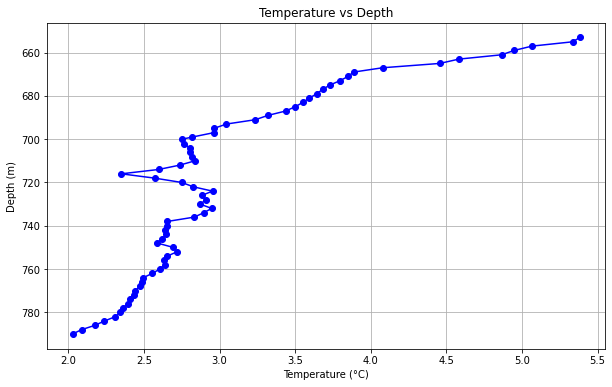

In [35]:
# plot temperature vs depth for filtered_data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Temperature'].values, filtered_df['Depth'].values, marker='o', linestyle='-', color='b')
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.title(f'Temperature vs Depth')
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.grid()
plt.show()

In [36]:
filtered_df


,Temperature_IQUODflag,wod_unique_cast,depthNumber,Depth,Temperature,time,latitude,longitude,Temperature_WODflag
14944647,1,13303563,0,653,5.383,88020.128913,-57.344002,170.453003,0.0
14944648,1,13303563,1,655,5.336,88020.128913,-57.344002,170.453003,0.0
14944649,1,13303563,2,657,5.066,88020.128913,-57.344002,170.453003,0.0
14944650,1,13303563,3,659,4.948,88020.128913,-57.344002,170.453003,0.0
14944651,1,13303563,4,661,4.866,88020.128913,-57.344002,170.453003,0.0
...,...,...,...,...,...,...,...,...,...
14944712,1,13303563,65,782,2.310,88020.128913,-57.344002,170.453003,0.0
14944713,1,13303563,66,784,2.238,88020.128913,-57.344002,170.453003,0.0
14944714,1,13303563,67,786,2.175,88020.128913,-57.344002,170.453003,0.0
14944715,1,13303563,68,788,2.087,88020.128913,-57.344002,170.453003,0.0


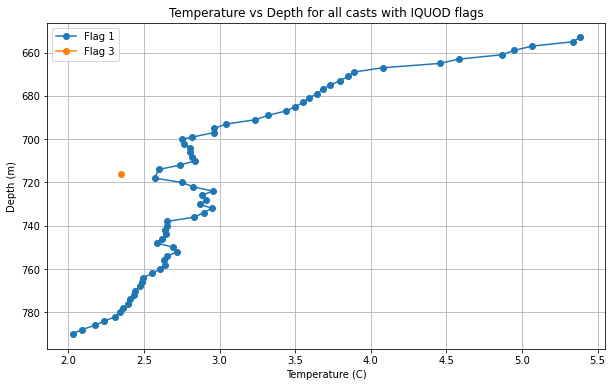

In [37]:
# plot temperature vs depth for all casts where the flag is greater than 0 and plot in a different color for each flag
plt.figure(figsize=(10, 6))
# get the unique flags
unique_flags = filtered_df['Temperature_IQUODflag'].unique()
# loop over the unique flags and plot each one
for flag in unique_flags:
    # get the casts for this flag
    cast_df = filtered_df[filtered_df['Temperature_IQUODflag'] == flag]
    # plot the temperature vs depth for this flag
    plt.plot(cast_df['Temperature'].values, cast_df['Depth'].values, 'o-', label=f'Flag {flag}')
plt.gca().invert_yaxis()
plt.title('Temperature vs Depth for all casts with IQUOD flags')
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()

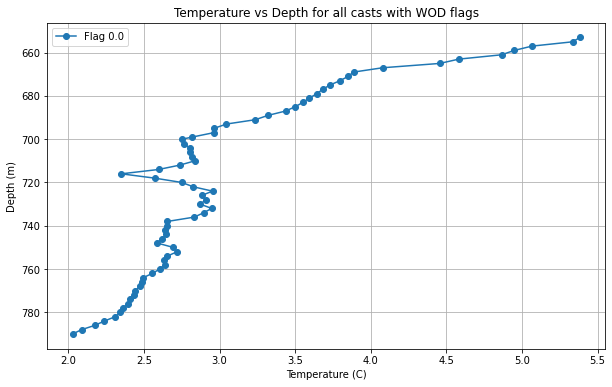

In [38]:
# plot temperature vs depth for all casts where the flag is greater than 0 and plot in a different color for each flag
plt.figure(figsize=(10, 6))
# get the unique flags
unique_flags = filtered_df['Temperature_WODflag'].unique()
# loop over the unique flags and plot each one
for flag in unique_flags:
    # get the casts for this flag
    cast_df = filtered_df[filtered_df['Temperature_WODflag'] == flag]
    # plot the temperature vs depth for this flag
    plt.plot(cast_df['Temperature'].values, cast_df['Depth'].values, 'o-', label=f'Flag {flag}')
plt.gca().invert_yaxis()
plt.title('Temperature vs Depth for all casts with WOD flags')
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()

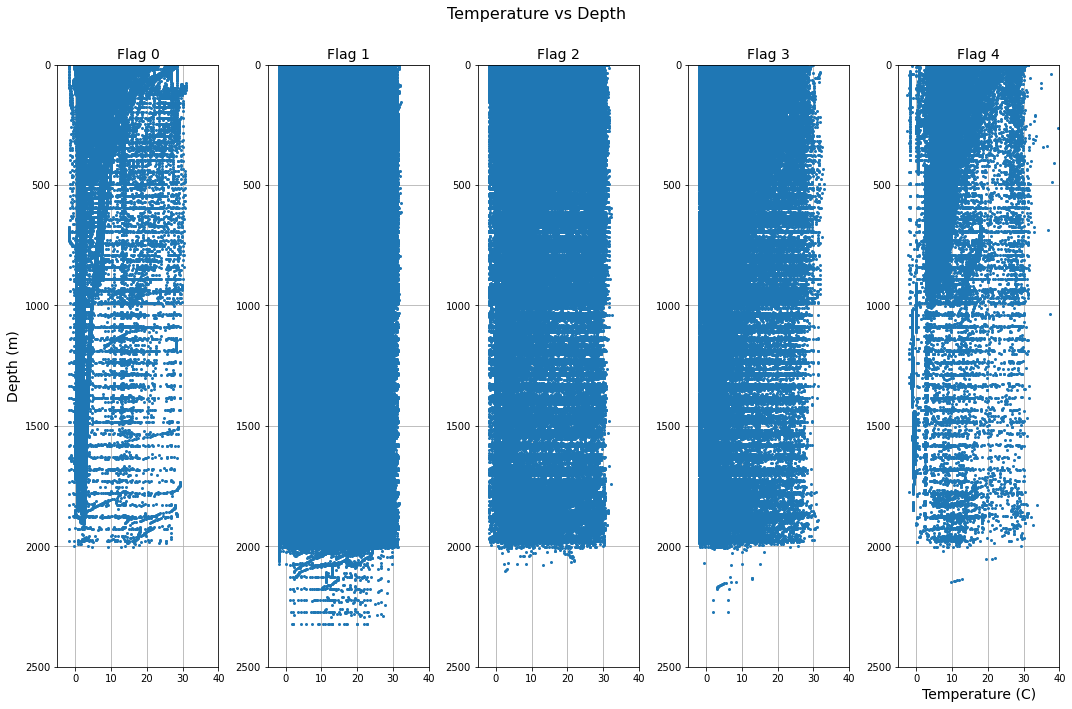

In [39]:
# plot temperature vs depth in five subplots, one for each flag
fig, axs = plt.subplots(1, 5, figsize=(15, 10), sharex=True)
# set the title of the figure
fig.suptitle(f'Temperature vs Depth', fontsize=16)
# set the x and y labels
axs[0].set_ylabel('Depth (m)', fontsize=14)
axs[4].set_xlabel('Temperature (C)', fontsize=14)
# loop over the flags
for i in range(5):
    # get the data for this flag
    flag_data = flags_df[flags_df['Temperature_IQUODflag'] == i]
    # plot the data
    axs[i].plot(flag_data['Temperature'].values, flag_data['Depth'].values, 'o', markersize=2)
    # set the title of the subplot
    axs[i].set_title(f'Flag {i}', fontsize=14)
    # set the x and y limits
    axs[i].set_xlim(-5, 40)
    axs[i].set_ylim(0, 2500)
    axs[i].invert_yaxis()
# set the grid
for ax in axs:
    ax.grid(True)
# show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


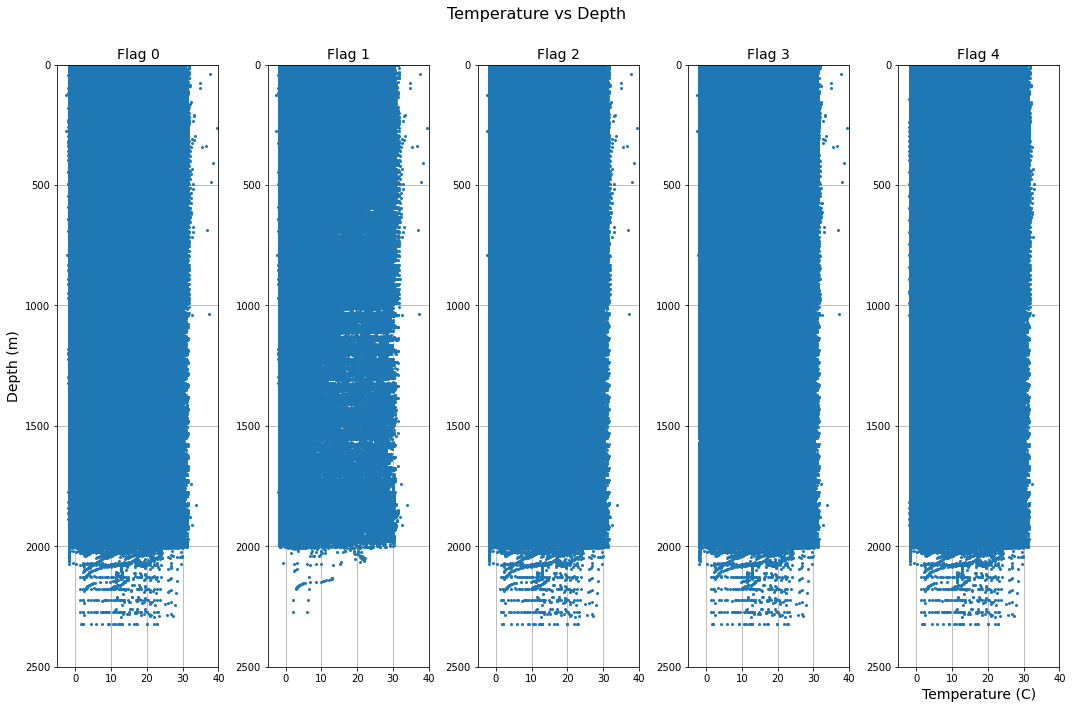

In [40]:
# flags show failed data, so conversely, the not failed data is good for that case?
# plot temperature vs depth in five subplots, one for each flag
fig, axs = plt.subplots(1, 5, figsize=(15, 10), sharex=True)
# set the title of the figure
fig.suptitle(f'Temperature vs Depth', fontsize=16)
# set the x and y labels
axs[0].set_ylabel('Depth (m)', fontsize=14)
axs[4].set_xlabel('Temperature (C)', fontsize=14)
# loop over the flags
for i in range(5):
    # get the data for this flag
    flag_data = flags_df[flags_df['Temperature_IQUODflag'] != i]
    # plot the data
    axs[i].plot(flag_data['Temperature'].values, flag_data['Depth'].values, 'o', markersize=2)
    # set the title of the subplot
    axs[i].set_title(f'Flag {i}', fontsize=14)
    # set the x and y limits
    axs[i].set_xlim(-5, 40)
    axs[i].set_ylim(0, 2500)
    axs[i].invert_yaxis()
# set the grid
for ax in axs:
    ax.grid(True)
# show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

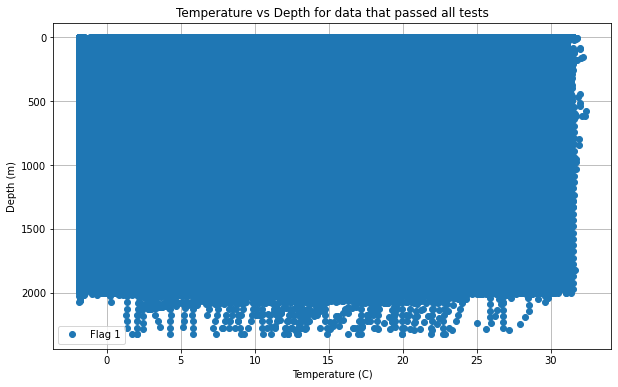

In [41]:
# what if we just plot data that is flag 1 (passed all tests)
plt.figure(figsize=(10, 6))
# get the casts for this flag
cast_df = flags_df[flags_df['Temperature_IQUODflag'] == 1]
# plot the temperature vs depth for this flag
plt.plot(cast_df['Temperature'].values, cast_df['Depth'].values, 'o', label=f'Flag 1')
plt.gca().invert_yaxis()
plt.title('Temperature vs Depth for data that passed all tests')
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


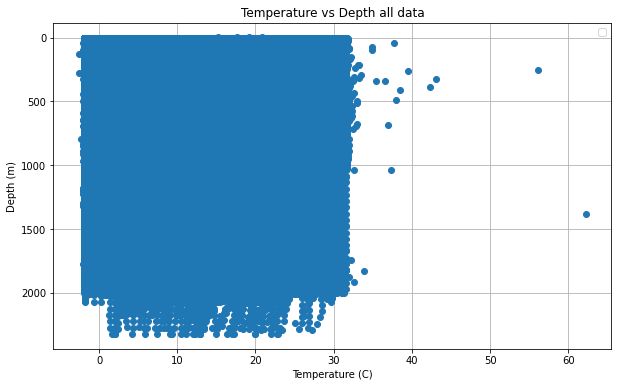

In [42]:
# all data
plt.figure(figsize=(10, 6))
# plot the temperature vs depth for this flag
plt.plot(flags_df['Temperature'].values, flags_df['Depth'].values, 'o')
plt.gca().invert_yaxis()
plt.title('Temperature vs Depth all data')
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()